In [112]:
import pandas as pd
import numpy as np
import datetime
import graphviz
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns

In [3]:
missing_values = ["n/a", "na", "--",""]
df = pd.read_csv('datafile.csv',na_values = missing_values)

In [4]:
print(df.shape)

(3915, 26)


In [5]:
df.columns

Index(['Shipments Reference ID', 'Vendor Name', 'Shipment Mode Code',
       'Shipment Pickup ETA Initial Window Start Date',
       'Shipment Pickup ETA Initial Window End Date',
       'Shipment Pickup Stop Planned Date',
       'Shipment Pickup Stop Completed Date', 'Shipment Quote Transit Days',
       'Shipment Drop-Off ETA Initial Window End Date',
       'Shipment Drop-Off Stop Planned Date',
       'Shipment Drop-Off Stop Completed Date',
       'Shipment Pickup ETA Overridden Initial Window End Date',
       'Shipment Drop-Off ETA Overridden Initial Window End Date',
       'Timeline Event Occurred Time', 'Timeline Event Event Type',
       'Timeline Event Event Sub Type', 'Timeline Event Description',
       'Current Address Has Location Data (Yes / No)',
       'Shipment Mode Description', 'Shipments Weight Lbs',
       'Shipments Purchase Order Number', 'Shipments Pro Number',
       'Shipments Pickup Number', 'Shipments Notes for Carrier',
       'Shipments External Tracki

In [6]:
df = df.rename(columns={'Shipments Reference ID':'RefId',
'Vendor Name': 'VName', 
'Timeline Event Event Type': 'TimeEventType',
'Shipment Quote Transit Days':'TransitDays',
'Shipment Mode Code': 'ShipModeCode','Shipment Pickup ETA Initial Window Start Date': 'PickUpETAIni','Shipment Pickup ETA Initial Window End Date': 'PickUpETAEnd','Shipment Pickup Stop Planned Date': 'PickUpStopPD','Shipment Pickup Stop Completed Date': 'PickUpStopCD','Shipment Drop-Off ETA Initial Window End Date': 'DropOffETAIni','Shipment Drop-Off Stop Planned Date': 'DropOffStopPD','Shipment Drop-Off Stop Completed Date': 'DropOffStopCD','Shipment Pickup ETA Overridden Initial Window End Date': 'PickUpETAOvWw','Shipment Drop-Off ETA Overridden Initial Window End Date': 'DropOffETAOvWw','Timeline Event Occurred Time': 'TimeEventOccurred','Timeline Event Event Sub Type': 'TimeEventSubType','Timeline Event Description': 'TimeEventTypeDesc','Current Address Has Location Data (Yes / No)': 'LocData','Shipment Mode Description': 'ShipModeDesc','Shipments Weight Lbs': 'Weight','Shipments Purchase Order Number': 'PO','Shipments Pro Number': 'ProNum','Shipments Pickup Number': 'PickUPNum','Shipments Notes for Carrier': 'Notes','Shipments External Tracking JSON': 'JSON','Shipments Tracked with Location Data': 'Tracking'
})

In [7]:
df.isnull().sum()

RefId                   0
VName                   0
ShipModeCode            0
PickUpETAIni          563
PickUpETAEnd          567
PickUpStopPD            0
PickUpStopCD          273
TransitDays           570
DropOffETAIni         564
DropOffStopPD           0
DropOffStopCD         274
PickUpETAOvWw        3915
DropOffETAOvWw       3694
TimeEventOccurred      11
TimeEventType          11
TimeEventSubType     1305
TimeEventTypeDesc      11
LocData                 0
ShipModeDesc            0
Weight               3915
PO                   1757
ProNum                  1
PickUPNum             213
Notes                3279
JSON                  576
Tracking                0
dtype: int64

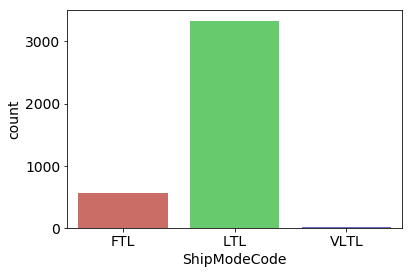

In [8]:
sns.countplot(x='ShipModeCode',data=df, palette='hls')
plt.show()

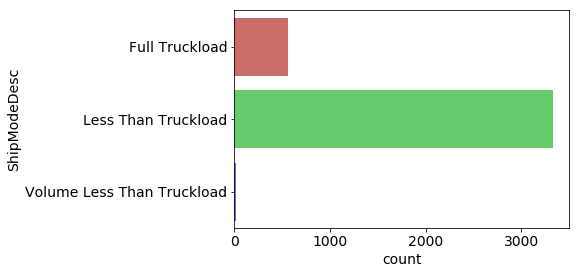

In [9]:
sns.countplot(y='ShipModeDesc',data=df, palette='hls')
plt.show()

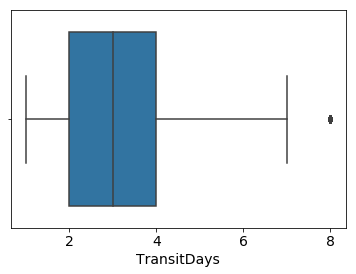

In [10]:
sns.boxplot(df['TransitDays'])
plt.show()

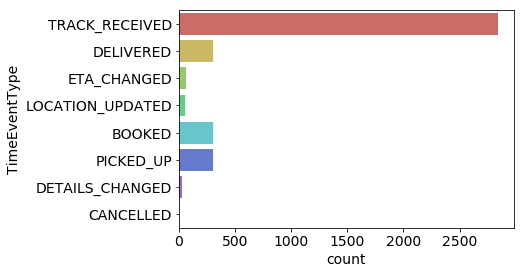

In [11]:
sns.countplot(y='TimeEventType',data=df, palette='hls')
plt.show()

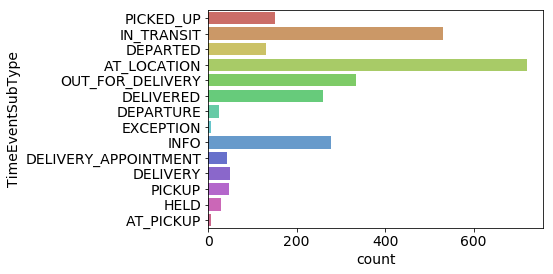

In [12]:
sns.countplot(y='TimeEventSubType',data=df, palette='hls')
plt.show()

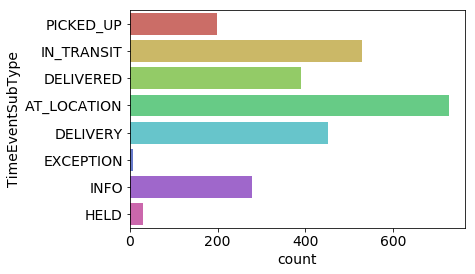

In [13]:
df['TimeEventSubType'] = np.where(df['TimeEventSubType'] == 'PICKUP', 'PICKED_UP', df['TimeEventSubType'])
df['TimeEventSubType'] = np.where(df['TimeEventSubType'] == 'OUT_FOR_DELIVERY', 'DELIVERY', df['TimeEventSubType'])
df['TimeEventSubType'] = np.where(df['TimeEventSubType'] == 'DELIVERY_APPOINTMENT', 'DELIVERY', df['TimeEventSubType'])
df['TimeEventSubType'] = np.where(df['TimeEventSubType'] == 'DEPARTURE', 'DELIVERY', df['TimeEventSubType'])
df['TimeEventSubType'] = np.where(df['TimeEventSubType'] == 'DEPARTED', 'DELIVERED', df['TimeEventSubType'])
df['TimeEventSubType'] = np.where(df['TimeEventSubType'] == 'AT_PICKUP', 'AT_LOCATION', df['TimeEventSubType'])
sns.countplot(y='TimeEventSubType',data=df, palette='hls')
plt.show()

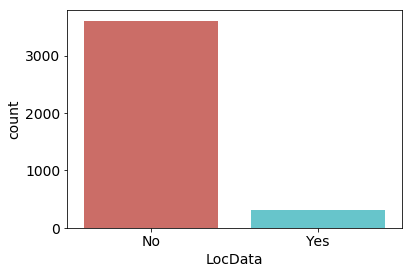

In [14]:
sns.countplot(x='LocData',data=df, palette='hls')
plt.show()

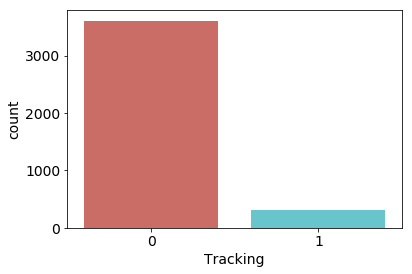

In [15]:
sns.countplot(x='Tracking',data=df, palette='hls')
plt.show()

In [58]:
df2 =  pd.crosstab(df.RefId, df.ShipModeDesc, values=1, aggfunc=np.max)

df2 = df2.replace(np.nan, 0)

print (df2)


ShipModeDesc  Full Truckload  Less Than Truckload  Volume Less Than Truckload
RefId                                                                        
53JDX2                   1.0                  0.0                         0.0
55V3PA                   1.0                  0.0                         0.0
55ZT8H                   1.0                  0.0                         0.0
58WU2P                   0.0                  1.0                         0.0
5C5PFF                   0.0                  1.0                         0.0
5EWMP4                   1.0                  0.0                         0.0
5FYQS8                   1.0                  0.0                         0.0
5HWLRF                   1.0                  0.0                         0.0
5KHB86                   0.0                  1.0                         0.0
5KR67S                   1.0                  0.0                         0.0
5LBNGD                   1.0                  0.0               

In [17]:
df3 = pd.crosstab(df.RefId, df.TimeEventType, values=df.TimeEventOccurred, aggfunc=np.max)
df3 = df3.rename(columns={'BOOKED':'BOOKEDTIME',
'CANCELLED': 'CANCELLEDTIME', 
'DELIVERED': 'DELIVEREDTIME',
'DETAILS_CHANGED':'DCHANGEDTIME','ETA_CHANGED':'ETA_CHANGEDTIME',
'LOCATION_UPDATED': 'LOCUPDTIME','PICKED_UP':'PICKED_UPTIME',
'TRACK_RECEIVED': 'TRACKRECTIME'})
df3

TimeEventType,BOOKEDTIME,CANCELLEDTIME,DELIVEREDTIME,DCHANGEDTIME,ETA_CHANGEDTIME,LOCUPDTIME,PICKED_UPTIME,TRACKRECTIME
RefId,,,,,,,,
53JDX2,2018-07-13 08:17:56,NaN,NaN,NaN,NaN,NaN,2018-07-13 15:39:14,NaN
55ZT8H,2018-07-13 08:29:06,NaN,NaN,NaN,NaN,NaN,2018-07-13 08:54:40,2018-07-16 09:35:14
58WU2P,2018-07-05 11:51:14,NaN,2018-07-12 08:33:12,2018-07-11 10:38:14,NaN,NaN,2018-07-06 09:45:23,2018-07-12 08:33:12
5C5PFF,2018-07-23 18:38:17,NaN,2018-07-26 17:39:00,NaN,NaN,NaN,2018-07-24 19:42:33,2018-07-26 17:39:00
5EWMP4,2018-07-05 08:44:49,NaN,NaN,NaN,NaN,NaN,2018-07-05 13:31:15,2018-07-05 16:19:30
5FYQS8,2018-07-11 08:43:31,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-12 16:07:39
5HWLRF,NaN,NaN,NaN,NaN,NaN,2018-07-19 11:46:33,2018-07-18 11:07:26,2018-07-20 08:01:33
5KHB86,2018-07-10 10:32:23,NaN,2018-07-16 11:45:00,NaN,NaN,NaN,2018-07-11 19:34:03,2018-07-16 11:45:00
5KR67S,2018-07-11 10:50:48,NaN,2018-07-23 10:09:13,NaN,NaN,2018-07-11 15:09:27,2018-07-11 15:11:02,NaN


In [18]:
df4 = pd.crosstab(df.RefId, df.TimeEventSubType, values=df.TimeEventOccurred, aggfunc=np.max)
df4 = df4.rename(columns={ 
'DELIVERED': 'DELIVEREDSTTIME','PICKED_UP':'PICKEDST_UPTIME'})
df4

TimeEventSubType,AT_LOCATION,DELIVEREDSTTIME,DELIVERY,EXCEPTION,HELD,INFO,IN_TRANSIT,PICKEDST_UPTIME
RefId,,,,,,,,
58WU2P,2018-07-08 14:51:00,2018-07-12 08:33:12,NaN,NaN,2018-07-09 01:09:17,2018-07-06 09:52:54,2018-07-12 07:37:49,2018-07-05 14:42:29
5C5PFF,2018-07-25 10:13:00,2018-07-26 17:39:00,2018-07-26 13:58:00,NaN,NaN,NaN,2018-07-25 23:47:16,2018-07-24 22:30:00
5KHB86,2018-07-13 23:39:00,2018-07-16 11:45:00,2018-07-16 09:13:00,NaN,NaN,2018-07-13 22:51:00,NaN,2018-07-10 16:35:00
632GAZ,2018-07-16 13:46:45,2018-07-16 15:55:00,2018-07-13 13:16:41,NaN,NaN,2018-07-10 12:01:46,2018-07-12 21:01:50,NaN
6BPBKX,2018-07-23 08:41:00,2018-07-25 09:52:56,2018-07-25 08:07:34,NaN,2018-07-23 08:41:00,2018-07-20 08:48:13,2018-07-23 03:01:00,2018-07-19 09:30:02
6DQLEN,2018-07-04 07:03:00,2018-07-09 11:49:00,2018-07-09 17:08:33,NaN,2018-07-04 13:55:00,2018-07-05 10:27:17,2018-07-03 00:22:14,2018-07-02 13:09:00
6FNW86,2018-07-06 03:21:00,2018-07-06 14:42:00,2018-07-06 08:48:00,NaN,NaN,2018-07-03 04:44:34,2018-07-03 01:43:59,2018-07-02 16:17:00
6KR2KP,NaN,2015-06-12 10:31:43,NaN,NaN,NaN,NaN,NaN,NaN
6MXNF3,2018-07-31 06:22:00,2018-08-06 09:46:00,2018-08-06 07:35:16,NaN,NaN,NaN,2018-08-05 23:33:38,2018-07-27 15:16:00


In [76]:
df5 = df.groupby('RefId').max()['TransitDays']
df5 = df5.replace(np.nan, 0)
df5

RefId
53JDX2    0.0
55V3PA    0.0
55ZT8H    0.0
58WU2P    2.0
5C5PFF    1.0
5EWMP4    0.0
5FYQS8    0.0
5HWLRF    0.0
5KHB86    1.0
5KR67S    0.0
5LBNGD    0.0
5PJE65    0.0
632GAZ    6.0
63Z76L    0.0
6BPBKX    3.0
6DQLEN    3.0
6FNW86    3.0
6FSJD8    0.0
6KR2KP    4.0
6LGP3C    0.0
6LRD8Z    0.0
6MXNF3    4.0
6SAJTQ    0.0
6WLA8C    1.0
6ZA56G    0.0
733LM4    0.0
74DQ5A    2.0
74JYPS    1.0
78EZXM    1.0
78TYC4    1.0
         ... 
W5TSVN    3.0
W66DMC    4.0
W7TG4D    4.0
W924FJ    3.0
WBSNM5    6.0
WC7DAE    1.0
WEHAHW    3.0
WL5NJQ    0.0
WLJ8QC    0.0
WRJXG6    6.0
WSAKN7    0.0
WTD3NN    0.0
WUNFLK    1.0
WVM7EW    0.0
WXK6G8    5.0
WY4EJC    0.0
X2TMFF    1.0
X4XSL4    0.0
X56TEM    0.0
XBX4J2    5.0
XDWCRY    0.0
XDZPBR    0.0
XEJQUZ    0.0
XFKBM4    0.0
XGFJH8    1.0
XJRE56    2.0
XL2CA8    0.0
XPKB3J    0.0
XRBPNL    0.0
XSAM5D    0.0
Name: TransitDays, Length: 394, dtype: float64

In [68]:
df6 = pd.crosstab(df.RefId, df.TimeEventType, values=1,  aggfunc=np.max)

df6 = df6.replace(np.nan, 0)
#Creating additional variables for later computation in the algorithm


df6.dropna()
df6

TimeEventType,BOOKED,CANCELLED,DELIVERED,DETAILS_CHANGED,ETA_CHANGED,LOCATION_UPDATED,PICKED_UP,TRACK_RECEIVED
RefId,,,,,,,,
53JDX2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55ZT8H,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
58WU2P,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
5C5PFF,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5EWMP4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5FYQS8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5HWLRF,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5KHB86,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5KR67S,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [90]:
df7 =pd.concat([df3, df4, df2, df5,  df6], axis=1, join_axes=[df6.index])
df7

,BOOKEDTIME,CANCELLEDTIME,DELIVEREDTIME,DCHANGEDTIME,ETA_CHANGEDTIME,LOCUPDTIME,PICKED_UPTIME,TRACKRECTIME,AT_LOCATION,DELIVEREDSTTIME,...,Volume Less Than Truckload,TransitDays,BOOKED,CANCELLED,DELIVERED,DETAILS_CHANGED,ETA_CHANGED,LOCATION_UPDATED,PICKED_UP,TRACK_RECEIVED
RefId,,,,,,,,,,,,,,,,,,,,,
53JDX2,2018-07-13 08:17:56,NaN,NaN,NaN,NaN,NaN,2018-07-13 15:39:14,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55ZT8H,2018-07-13 08:29:06,NaN,NaN,NaN,NaN,NaN,2018-07-13 08:54:40,2018-07-16 09:35:14,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
58WU2P,2018-07-05 11:51:14,NaN,2018-07-12 08:33:12,2018-07-11 10:38:14,NaN,NaN,2018-07-06 09:45:23,2018-07-12 08:33:12,2018-07-08 14:51:00,2018-07-12 08:33:12,...,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
5C5PFF,2018-07-23 18:38:17,NaN,2018-07-26 17:39:00,NaN,NaN,NaN,2018-07-24 19:42:33,2018-07-26 17:39:00,2018-07-25 10:13:00,2018-07-26 17:39:00,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5EWMP4,2018-07-05 08:44:49,NaN,NaN,NaN,NaN,NaN,2018-07-05 13:31:15,2018-07-05 16:19:30,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5FYQS8,2018-07-11 08:43:31,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-12 16:07:39,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5HWLRF,NaN,NaN,NaN,NaN,NaN,2018-07-19 11:46:33,2018-07-18 11:07:26,2018-07-20 08:01:33,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5KHB86,2018-07-10 10:32:23,NaN,2018-07-16 11:45:00,NaN,NaN,NaN,2018-07-11 19:34:03,2018-07-16 11:45:00,2018-07-13 23:39:00,2018-07-16 11:45:00,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5KR67S,2018-07-11 10:50:48,NaN,2018-07-23 10:09:13,NaN,NaN,2018-07-11 15:09:27,2018-07-11 15:11:02,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [101]:
# RULES


df7.loc[pd.isna(df7['BOOKEDTIME']), 'TARGET'] = 1
df7.loc[pd.isna(df7['TARGET']), 'TARGET'] = 0
df7.loc[df7['TransitDays'] > df7['TransitDays'].median() * 2,'TARGET'] = 1
df7

,BOOKEDTIME,CANCELLEDTIME,DELIVEREDTIME,DCHANGEDTIME,ETA_CHANGEDTIME,LOCUPDTIME,PICKED_UPTIME,TRACKRECTIME,AT_LOCATION,DELIVEREDSTTIME,...,TransitDays,BOOKED,CANCELLED,DELIVERED,DETAILS_CHANGED,ETA_CHANGED,LOCATION_UPDATED,PICKED_UP,TRACK_RECEIVED,TARGET
RefId,,,,,,,,,,,,,,,,,,,,,
53JDX2,2018-07-13 08:17:56,NaN,NaN,NaN,NaN,NaN,2018-07-13 15:39:14,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
55ZT8H,2018-07-13 08:29:06,NaN,NaN,NaN,NaN,NaN,2018-07-13 08:54:40,2018-07-16 09:35:14,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
58WU2P,2018-07-05 11:51:14,NaN,2018-07-12 08:33:12,2018-07-11 10:38:14,NaN,NaN,2018-07-06 09:45:23,2018-07-12 08:33:12,2018-07-08 14:51:00,2018-07-12 08:33:12,...,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
5C5PFF,2018-07-23 18:38:17,NaN,2018-07-26 17:39:00,NaN,NaN,NaN,2018-07-24 19:42:33,2018-07-26 17:39:00,2018-07-25 10:13:00,2018-07-26 17:39:00,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5EWMP4,2018-07-05 08:44:49,NaN,NaN,NaN,NaN,NaN,2018-07-05 13:31:15,2018-07-05 16:19:30,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5FYQS8,2018-07-11 08:43:31,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-12 16:07:39,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5HWLRF,NaN,NaN,NaN,NaN,NaN,2018-07-19 11:46:33,2018-07-18 11:07:26,2018-07-20 08:01:33,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
5KHB86,2018-07-10 10:32:23,NaN,2018-07-16 11:45:00,NaN,NaN,NaN,2018-07-11 19:34:03,2018-07-16 11:45:00,2018-07-13 23:39:00,2018-07-16 11:45:00,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5KR67S,2018-07-11 10:50:48,NaN,2018-07-23 10:09:13,NaN,NaN,2018-07-11 15:09:27,2018-07-11 15:11:02,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


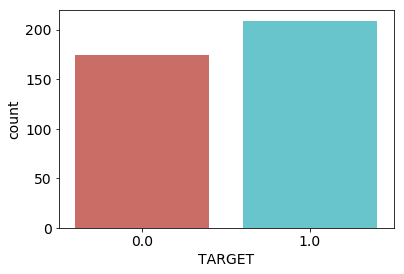

In [102]:
sns.countplot(x='TARGET',data=df7, palette='hls')
plt.show()

In [103]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [104]:
X = df7.iloc[:,16:28]
X.describe

<bound method NDFrame.describe of         Full Truckload  Less Than Truckload  Volume Less Than Truckload  \
RefId                                                                     
53JDX2             1.0                  0.0                         0.0   
55ZT8H             1.0                  0.0                         0.0   
58WU2P             0.0                  1.0                         0.0   
5C5PFF             0.0                  1.0                         0.0   
5EWMP4             1.0                  0.0                         0.0   
5FYQS8             1.0                  0.0                         0.0   
5HWLRF             1.0                  0.0                         0.0   
5KHB86             0.0                  1.0                         0.0   
5KR67S             1.0                  0.0                         0.0   
5LBNGD             1.0                  0.0                         0.0   
5PJE65             1.0                  0.0                       

In [105]:
X.replace(np.nan, 0)
X.isnull().sum()

Full Truckload                0
Less Than Truckload           0
Volume Less Than Truckload    0
TransitDays                   0
BOOKED                        0
CANCELLED                     0
DELIVERED                     0
DETAILS_CHANGED               0
ETA_CHANGED                   0
LOCATION_UPDATED              0
PICKED_UP                     0
TRACK_RECEIVED                0
dtype: int64

In [106]:
y = df7.iloc[:,28]
y.isnull().sum()

0

In [108]:
writer = pd.ExcelWriter('output3233.xlsx')
X.to_excel(writer,'Sheet1')
y.to_excel(writer,'Sheet2')
writer.save()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

1.0


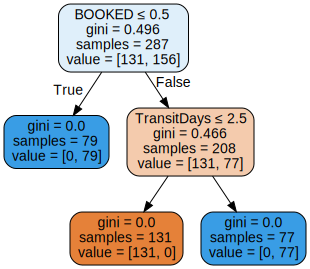

In [115]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)
print(model.score(X_test,y_test))
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph